# Decision Tree + Random Forest + Graphviz (in sklearn)

### Decision tree is a good classifier.
### Easy to read and analysis
### Great efficiency: max calculation is no larger than depth of tree
### Insensitive to intermediate value loss
### But it has overfitting drawback

We classify the data by criteria that entropy is going down as the process keeps running.
document can be found: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

sklearn.tree.DecisionTreeClassifier(
    criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity
           and “entropy” for the information gain.
spliter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the
         best split and “random” to choose the best random split.
max_depth:The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until
          all leaves contain less than min_samples_split samples.
presort: Whether to presort the data to speed up the finding of best splits in fitting.

Random forest (in sklearn)
sklearn.ensemble.RandomForestClassifier(
n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0,
warm_start=False, class_weight=None)
n_estimators: The number of trees in the forest
bootstrap: Whether bootstrap samples are used when building trees.

## Read data

In [3]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt


def iris_type(s):
    s = s.decode('UTF-8')
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


iris_feature = 'sepal length', 'sepal width', 'petal length', 'pethal width'

path = 'Iris.txt'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x, y = np.split(data, (4,), axis=1)
x = x[:, :2]  # for the sake of visualization, we use the first two columns
# if a node has more than 10 samples, we split it: min_samples_split =  10
# after the split, if there are more than 10 sub-samples, stop splitting : min_sample_leaf = 10

## Train the model

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3) #criterion is the decrease of entropy
dt_clf = clf.fit(x, y)

## Save the tree

In [5]:
f = open('iris_tree.dot', 'w')
tree.export_graphviz(dt_clf, out_file=f)

## Draw the plot

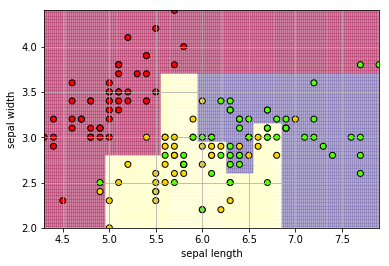

In [6]:
N, M = 500, 500
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_hat = dt_clf.predict(x_test)
y_hat = y_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), edgecolors='k', cmap=plt.cm.prism)
plt.xlabel(iris_feature[0])
plt.ylabel(iris_feature[1])
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

## Calculate the accuracy

In [7]:
y_hat = dt_clf.predict(x)
y = y.reshape(-1)
print(y_hat.shape)
print(y.shape)
result = (y_hat == y)
print(y_hat)
print(y)
print(result)
c = np.count_nonzero(result)
print(c)
print('Accuracy: %.2f%%' % (100 * float(c) / float(len(result))))

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  2.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  2.  2.  2.  0.  2.
  1.  2.  2.  2.  1.  1.  1.  2.  2.  0.  2.  1.  2.  1.  2.  2.  2.  2.
  1.  2.  2.  2.  2.  0.  2.  2.  1.  2.  2.  2.  2.  2.  1.  2.  1.  2.
  2.  1.  1.  2.  2.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

## Interpretation

The accuracy with 2 characteristics are only 82%,which is slightly higher than that of logistic regression
But the accuracy is still low.

## Draw all the combination of dependents

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  2.  1.  1.  1.  1.
  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.  2.  2.  2.  2.  0.  2.
  1.  2.  2.  2.  1.  1.  1.  2.  2.  0.  2.  1.  2.  1.  2.  2.  2.  2.
  1.  2.  2.  2.  2.  0.  2.  2.  1.  2.  2.  2.  2.  2.  1.  2.  1.  2.
  2.  1.  1.  2.  2.  1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  2.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  2.  2.  2.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

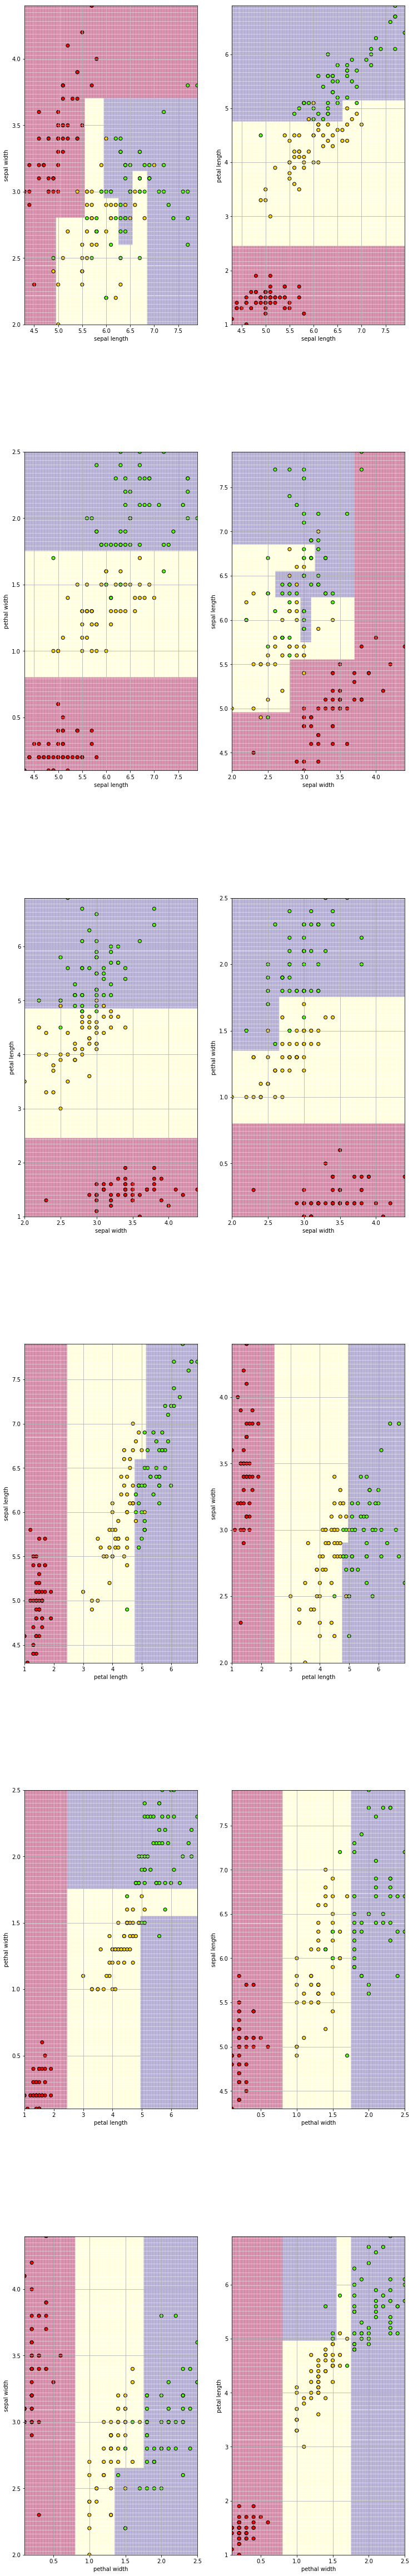

In [20]:
# I rewrite the above function
def iris_type(s):
    s = s.decode('UTF-8')
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


iris_feature = 'sepal length', 'sepal width', 'petal length', 'pethal width'

path = 'Iris.txt'
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x, y = np.split(data, (4,), axis=1)

# if a node has more than 10 samples, we split it: min_samples_split =  10
# after the split, if there are more than 10 sub-samples, stop splitting : min_sample_leaf = 10
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
dt_clf = clf.fit(x, y)

# save tree
f = open('iris_tree.dot', 'w')
tree.export_graphviz(dt_clf, out_file=f)


# plot
def plot_result(i, j, x, y, temp):
    N, M = 500, 500
    x1_min, x1_max = x[:, i].min(), x[:, i].max()
    x2_min, x2_max = x[:, j].min(), x[:, j].max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)
    x_test = np.stack((x1.flat, x2.flat), axis=1)
    dt_clf = clf.fit(x[:, (i, j)], y)
    y_hat = dt_clf.predict(x_test)
    y_hat = y_hat.reshape(x1.shape)
    fig.add_subplot(6, 2, temp)
    plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.Spectral, alpha=0.1)
    plt.scatter(x[:, i], x[:, j], c=y.reshape(-1), edgecolors='k', cmap=plt.cm.prism)
    plt.xlabel(iris_feature[i])
    plt.ylabel(iris_feature[j])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
    # calculate the prediction
    y_hat = dt_clf.predict(x[:, (i, j)])
    y = y.reshape(-1)
    print(y_hat.shape)
    print(y.shape)
    result = (y_hat == y)
    print(y_hat)
    print(y)
    print(result)
    c = np.count_nonzero(result)
    print(c)
    print('Accuracy for %s: %.2f%%' % (iris_feature[i] + '+'  + iris_feature[j],100 * float(c) / float(len(result))))


temp = 0
fig = plt.figure(figsize=(10,65))
for i in [0, 1, 2, 3]:
    for j in [0, 1, 2, 3]:
        if i != j:
            temp += 1
            plot_result(i, j, x, y, temp)
plt.subplots_adjust(left=0.025, right=1 - 0.025, top=0.99, bottom=0.01, hspace=0.4)
plt.show()

## Interpretation:

It can be seen that different combinations have quiet different accuracy. Some can be good predictor, others are bad estimator. But anyway, I cannot see any reason not to use all 4 as parameters. 2 parameters are good for visualizing, but not for estimating.

## Use all 4 attributes as determining factors

In [21]:
# get data
x, y = np.split(data, (4,), axis=1)
# train the model
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3) #criterion is the decrease of entropy
dt_clf = clf.fit(x, y)
#calculate accuracy
y_hat = dt_clf.predict(x)
y = y.reshape(-1)
print(y_hat.shape)
print(y.shape)
result = (y_hat == y)
print(y_hat)
print(y)
print(result)
c = np.count_nonzero(result)
print(c)
print('Accuracy for All 4 Attributes: %.2f%%' % (100 * float(c) / float(len(result))))

(150,)
(150,)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1

## Demonstrate the depth affect on accuracy

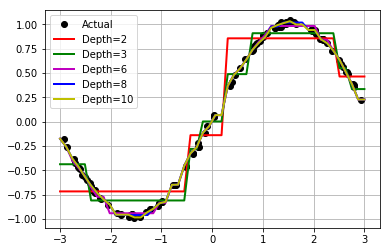

In [8]:
N = 100
x = np.random.rand(N) * 6 - 3
x.sort()
y = np.sin(x) + np.random.rand(N) * 0.05
x = x.reshape(-1, 1)
depth = [2, 3, 6, 8, 10]
clr = 'rgmby'
# criterion using mean square error
reg = [tree.DecisionTreeRegressor(criterion='mse', max_depth=depth[0]),
       tree.DecisionTreeRegressor(criterion='mse', max_depth=depth[1]),
       tree.DecisionTreeRegressor(criterion='mse', max_depth=depth[2]),
       tree.DecisionTreeRegressor(criterion='mse', max_depth=depth[3]),
       tree.DecisionTreeRegressor(criterion='mse', max_depth=depth[4])]
plt.plot(x, y, 'ko', linewidth=2, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for i, r in enumerate(reg):
    dt = r.fit(x, y)
    y_hat = dt.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=clr[i], linewidth=2, label='Depth=%d' % depth[i])
plt.legend(loc='upper left')
plt.grid()
plt.show()

Surely, the more depth you have, the better prediction. However, overfitting is a constant concern.